In [1]:
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras.models import Model
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
INC=K.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [3]:
'''
#INC.summary()
poolindices=[3,6,11,16,21]

x=INC.layers[0].output

INC.layers[25].activation=None
for i in range(1,len(INC.layers)):
    if i in poolindices:
        #print(INC.layers[i].pool_size)
        x=K.layers.AveragePooling2D()(x)
    else:
        x=INC.layers[i](x)
    INC.layers[i].trainable=False

INC = Model(inputs=INC.layers[0].input, outputs=x)
'''
INC.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [75]:
INC.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [85]:
outputs = []
for x in INC.layers:
    if 'mixed' in x.name:
        print(x.name)
        outputs.append(x.output)
interINC=tf.keras.Model([INC.input], outputs)

mixed0
mixed1
mixed2
mixed3
mixed4
mixed5
mixed6
mixed7
mixed8
mixed9_0
mixed9
mixed9_1
mixed10


In [196]:
psize=400
'''
im=Image.open('./deepstyle/lo.jpg')
im=np.array(im.resize((psize,psize))).astype(np.float32).reshape(1,psize,psize,3)
preprocessed_input = tf.keras.applications.INC19.preprocess_input(im)
pred=interINC.predict(im)

plt.figure(figsize=(30,30))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(pred[1][:,:,:,i].reshape((244,244)))
plt.show()


layernum=19
filternum=50
targetact=pred[layernum][0][:,:,filternum].copy()*10
#whiteim=np.random.rand(1,psize,psize,3).astype(np.float32)
'''
im=Image.open('./deepstyle/dalitime.jpg')
whiteim=np.array(im.resize((psize,psize))).astype(np.float32).reshape(1,psize,psize,3)[:,:,:,::-1]/255.0
#whiteim=np.random.rand(1,psize,psize,3).astype(np.float32)
img = tf.Variable(whiteim)
base_shape = tf.cast(tf.shape(img)[1:-1], tf.float32)

origvar=tf.reduce_sum(tf.image.total_variation(img))

In [197]:
def clip_0_1(image):
    return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

def contentloss(actlist):
    losses = []
    for act in actlist:
        loss = tf.math.reduce_mean(act)
        losses.append(loss)
    return  tf.reduce_sum(losses)
   

layerlist=[25]
filterlist=np.arange(301,302).astype(np.int32)
stepsize=0.005
def contentopt(img,layerlist,filterlist,stepsize,origvar):
    with tf.GradientTape() as g:
        #Sprint(img)
        pred=interINC(img)
        #print(pred[-1].shape)
        #actlist=[pred[x][0][filter] for filter in filterlist for x in layerlist] #[0][:,:,filter] for filter in filterlist
        loss=contentloss([pred[x][:,:,:,filter] for filter in filterlist for x in range(7,8)])#-(tf.abs(tf.reduce_sum(tf.image.total_variation(img))-origvar))*0.0005
        
    
    #trainablevar=img
    gradients = g.gradient(loss,img)
    gradients /= tf.math.reduce_std(gradients) + 1e-8 
    #print(gradients)
    img.assign(tf.clip_by_value(img+gradients*stepsize, 0, 1))
    #img = 
    print(loss)
    return img
    
    
OCTAVE_SCALE = 1.25





tf.Tensor(43.54945, shape=(), dtype=float32)
tf.Tensor(56.58373, shape=(), dtype=float32)
tf.Tensor(63.249393, shape=(), dtype=float32)
tf.Tensor(72.71711, shape=(), dtype=float32)
tf.Tensor(78.42968, shape=(), dtype=float32)
tf.Tensor(83.40273, shape=(), dtype=float32)
tf.Tensor(85.91282, shape=(), dtype=float32)
tf.Tensor(90.091064, shape=(), dtype=float32)
tf.Tensor(93.14153, shape=(), dtype=float32)
tf.Tensor(100.38109, shape=(), dtype=float32)
tf.Tensor(100.094666, shape=(), dtype=float32)
tf.Tensor(106.43964, shape=(), dtype=float32)
tf.Tensor(108.80295, shape=(), dtype=float32)
tf.Tensor(109.83567, shape=(), dtype=float32)
tf.Tensor(116.831726, shape=(), dtype=float32)
tf.Tensor(119.006195, shape=(), dtype=float32)
tf.Tensor(123.23143, shape=(), dtype=float32)
tf.Tensor(121.92206, shape=(), dtype=float32)
tf.Tensor(125.671616, shape=(), dtype=float32)
tf.Tensor(124.83216, shape=(), dtype=float32)
tf.Tensor(40.41977, shape=(), dtype=float32)
tf.Tensor(54.488945, shape=(), dtype=f

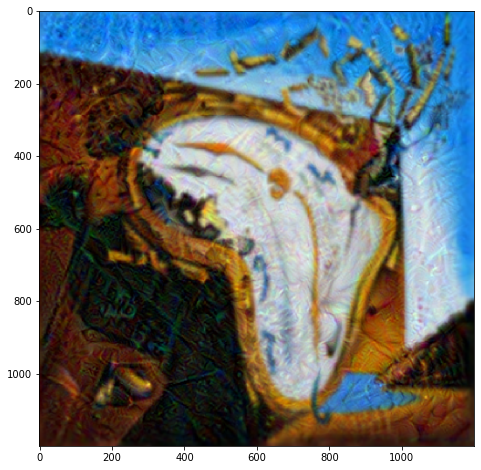

In [195]:
'''
for i in range(400,410):
    im=Image.open('./deepstyle/dalitime.jpg')
    whiteim=np.array(im.resize((psize,psize))).astype(np.float32).reshape(1,psize,psize,3)[:,:,:,::-1]/255.0
    img = tf.Variable(whiteim)
    base_shape = tf.cast(tf.shape(img)[1:-1], tf.float32) 
    filterlist=np.arange(0)
'''
filterlist=np.arange(400)
for n in np.arange(-8,-4):    
    if n>-10:
        new_shape = tf.cast(base_shape*(OCTAVE_SCALE**n), tf.int32)
        pdim=new_shape.numpy()[1]
        img =tf.Variable(tf.image.resize(img, new_shape).numpy())
        for i in range(20):
            cucc=contentopt(img,layerlist,filterlist,stepsize,origvar)

imgplot=tf.image.resize(img, tf.cast(base_shape,tf.int32))
plt.figure(figsize=(8,8))
plt.imshow(imgplot.numpy().reshape(psize,psize,3)[:,:,::-1])
plt.show()
